# Electric Vehicle Analysis

## About the Project  
This project was conducted to examine **the usage rates of electric and hybrid vehicles in Washington State** and to provide strategic recommendations for energy infrastructure planning.  

### Objectives  
1. **Analyze the distribution of electric vehicles across cities.**  
2. **Identify the most common brands among electric vehicles.**  
3. **Understand the reasons behind Tesla's market leadership.**  
4. **Develop concrete recommendations for energy infrastructure investments.**  

## About the Dataset

### Source and Scope
This project uses the **Electric Vehicle Population Data** dataset obtained from Kaggle. The dataset is suitable for analyzing the distribution of electric and hybrid vehicles across cities, brand and model popularity, and vehicle ranges.

- **Source:** Washington State Department of Licensing  
- **Scope:**  
    - Electric and hybrid vehicles (features such as model, brand, range)  
    - City information where the vehicles are registered  
    - Vehicle types (Plug-in Hybrid Electric Vehicle - PHEV or Battery Electric Vehicle - BEV)  e - BEV)


### Dataset Structure
The dataset contains **200,000+ rows** and **17 columns**. Example columns:
- **`Model`**: Vehicle model (e.g., Tesla Model S)  
- **`Make`**: Manufacturer (e.g., Tesla, Nissan)  
- **`Electric Range`**: Distance the vehicle can travel on a full charge (in miles)  
- **`City`**: City where the vehicle is registered (e.g., Seattle)  

## Scales
Meanings and units of the variables in the dataset:

- **Electric Range (Range):** Indicates how many miles an electric vehicle can travel on a full charge.  
  - **Unit:** Miles (1 mile ≈ 1.609 km)  
  - **Scale:** Continuous numerical variable  
- **City:** Specifies the city where the vehicle is registered.  
  - **Scale:** Categorical variable  
- **Make:** Specifies the manufacturer of the electric vehicle.  
  - **Scale:** Categorical variable  
- **Electric Vehicle Type:** Indicates whether the vehicle is a Plug-in Hybrid or a BEV (Battery Electric Vehicle).  
  - **Scale:** Categorical variable  

## Business Problem
The project seeks answers to the following questions to understand the popularity of electric vehicles and the reasons behind it:
- How is the distribution of electric vehicles across cities?
- Why is Tesla the market leader?
- Which regions should be prioritized for energy infrastructure investments?

This analysis aims to guide energy sector players in making strategic decisions.

In [1]:
import pandas as pd
import numpy as np
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. General information about the data and specific statistical analysis.

In [2]:
import pandas as pd

file_path = "/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

print(df.info())

print("***********************************************")

print(df.head())

print("***********************************************")

print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [3]:
import random

# Let's use the function to add missing data
def add_random_missing_values(df: pd.DataFrame, missing_rate= 0.03, seed: random = 42) -> pd.DataFrame:

    # Copy DataFrame
    df_missing = df.copy()

    df_size = df.size
    num_missing = int(df_size * missing_rate)

    # Set seed
    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0,df.shape[0] - 1)
        col_idx = random.randint(0,df.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

    



In [4]:
# Add Random missing value to dataset
df_with_missing = add_random_missing_values(df, missing_rate=0.03)

# First 5 data
df_with_missing.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,NaN,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),NaN,266.0,0.0,43.0,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940.0,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJYGDEE5L,Snohomish,Lynnwood,WA,98036.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,21.0,124511187.0,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC,5.306105e+10
6,KM8S6DA23N,Kitsap,Poulsbo,WA,98370.0,2022.0,HYUNDAI,SANTA FE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,31.0,0.0,23.0,212217764.0,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
7,7FCTGAAA1P,Snohomish,Arlington,WA,98223.0,2023.0,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,252414039.0,POINT (-122.11597 48.194109),PUGET SOUND ENERGY INC,5.306105e+10
8,5YJYGDEE9L,King,Kent,WA,98031.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,47.0,112668510.0,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
9,1N4AZ0CP2F,King,NaN,WA,NaN,2015.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,45.0,109765204.0,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


### Let's see the number of rows and columns in the dataset

In [5]:
df.shape

(205439, 17)

In [6]:
# Columns of df
print(list(df.columns),'\n')

# Total column numbers
print(f"Total column number in the dataset: {len(df.columns)}")

['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'] 

Total column number in the dataset: 17


## 1.1 Visualization of missing data

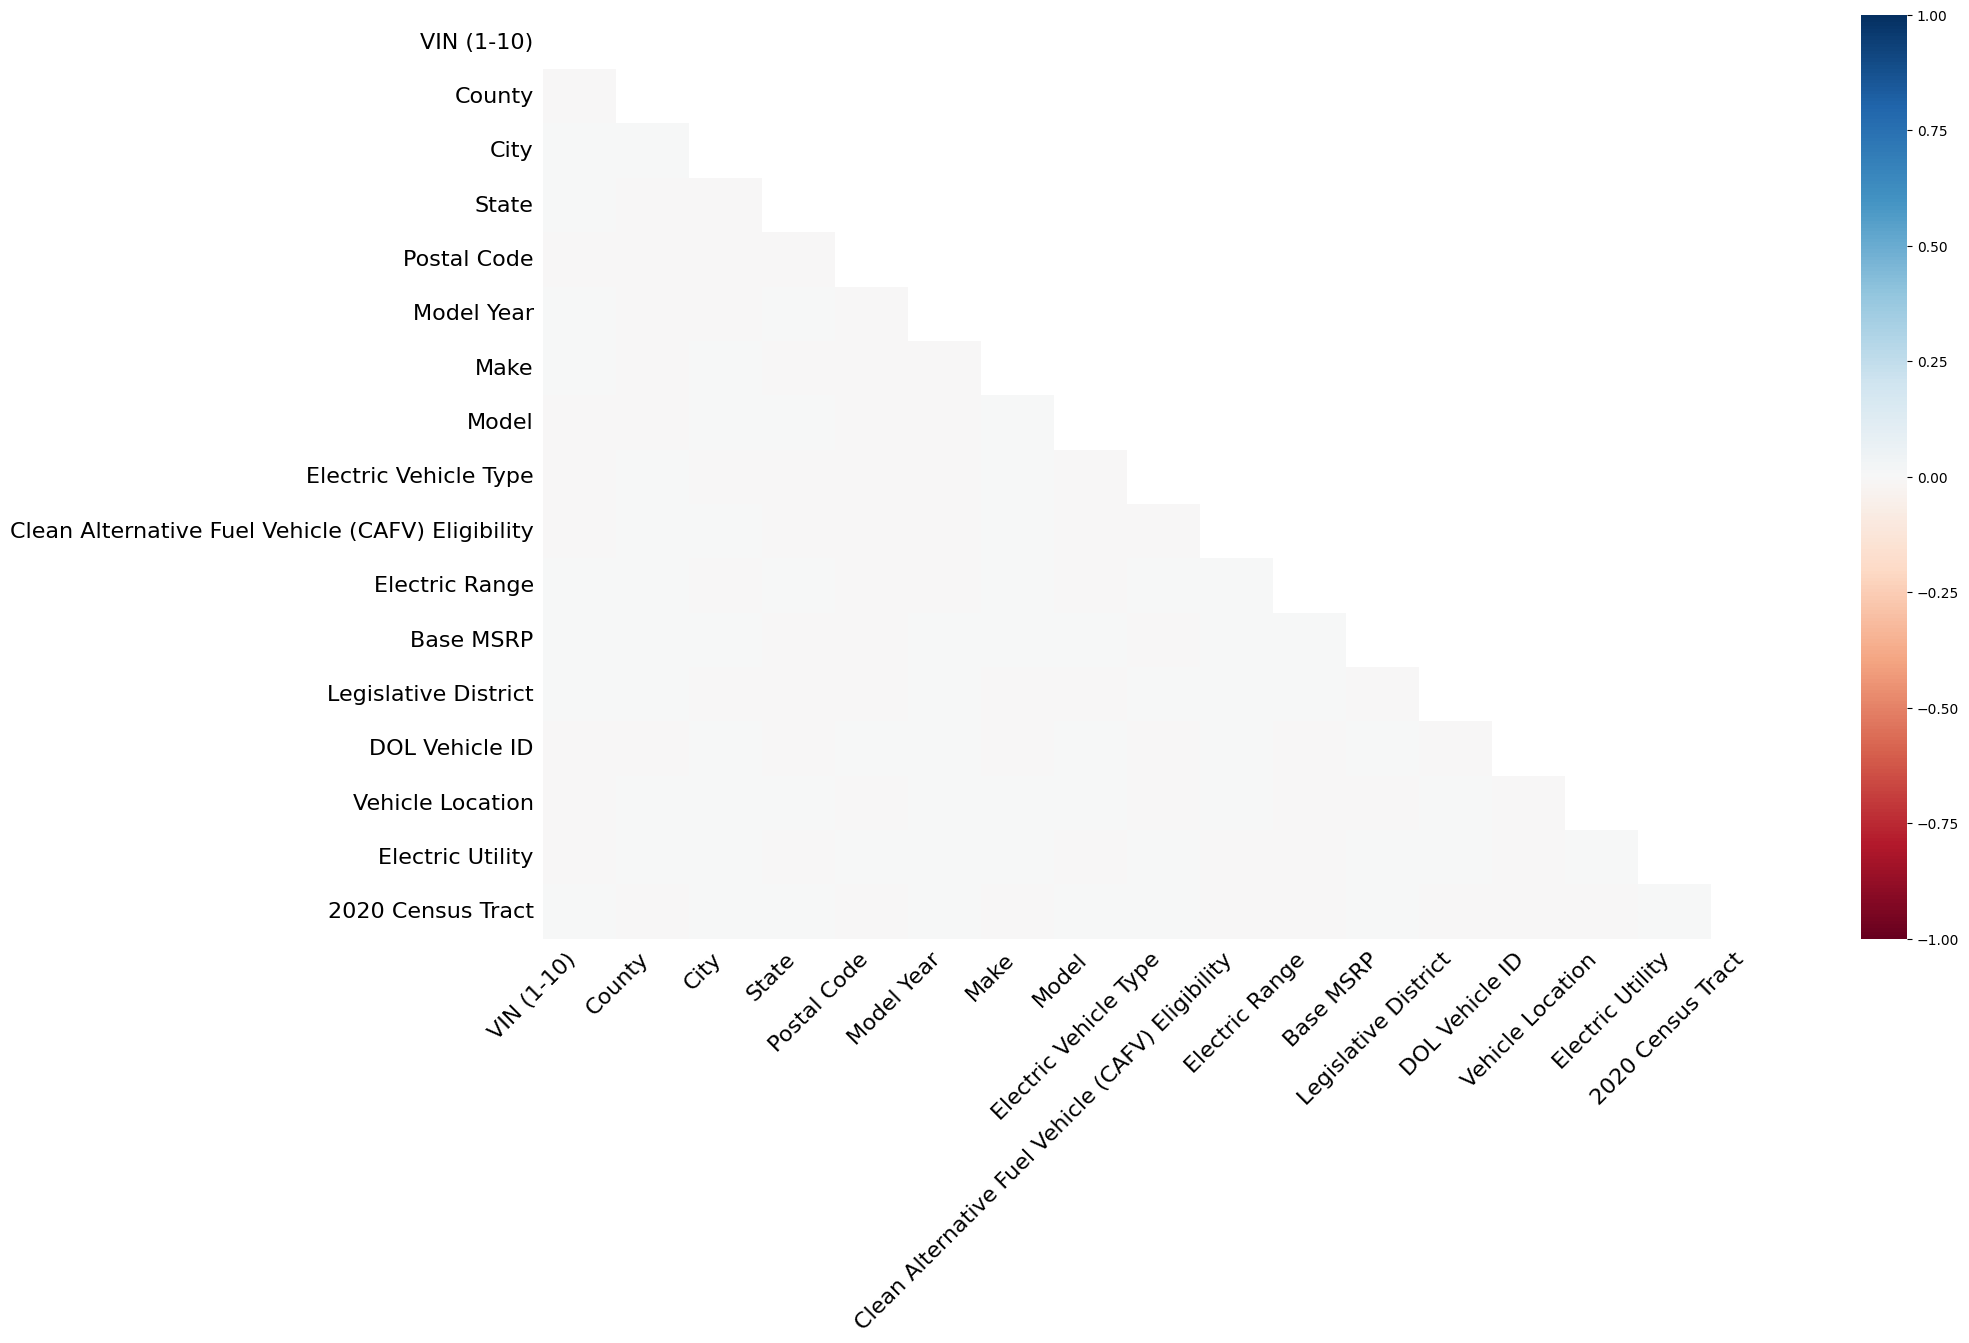

In [7]:
# Visualization libraries
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing value
msno.heatmap(df_with_missing)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

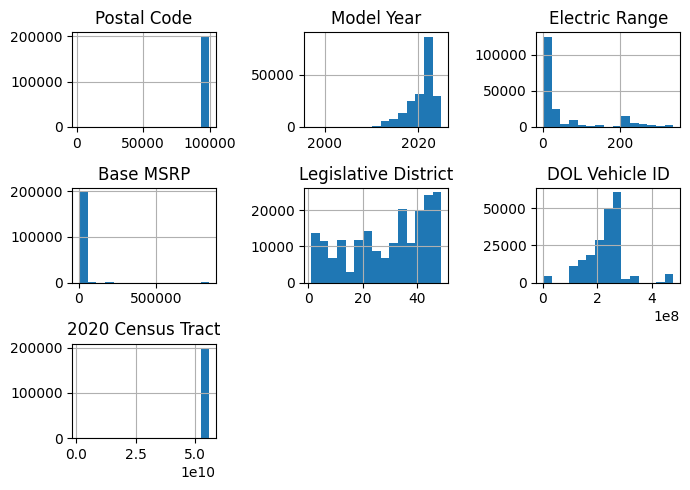

In [8]:
# Select numeric columns
numeric_columns = df_with_missing.select_dtypes(include = ['float64', 'int64']).columns

# Draw histograms
df_with_missing[numeric_columns].hist(bins = 15, figsize = (7,5))
plt.tight_layout()
plt.show


### Examining the correlation matrix

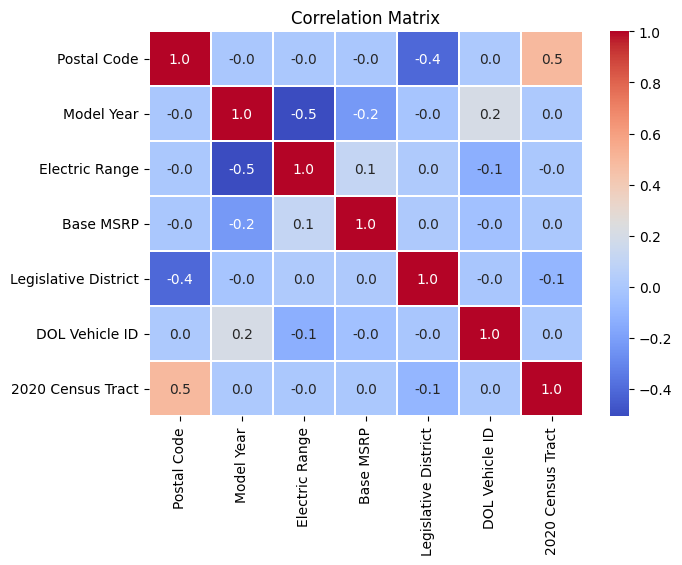

In [9]:
# İmport neccessary lib
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df_with_missing[numeric_columns].corr()

# Visualize correlation matrix
plt.figure(figsize = (7,5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.1f', linewidths = 0.2)
plt.title("Correlation Matrix")
plt.show()

# 2. Management of Missing Data

### The purpose of the project should be taken into consideration when managing missing data. There are some points to be considered so that data cleaning processes do not manipulate the results of the analysis.

## 2.1 Understanding the importance of data
### Some columns with missing data are critical for our project. These columns should be identified.

## 2.2 The Effect of Missing Data Rate
### If the missing data rate in a column is very high (I chose this rate as 50 percent for my own project), it makes sense to delete the entire column. However, if this rate is low, it would be more logical to fill in these values.

In [10]:
# Examine the missing data rates.
missing_info = pd.DataFrame({'Missing Value Number': df_with_missing.isnull().sum(),
                            'Missing Value Rate (%)': (df_with_missing.isnull().sum() / len(df_with_missing)) * 100})

# Kritik ve ikincil kritik sutunlari belirliyorum
critical_columns = ['Electric Range', 'Base MSRP', 'Make', 'Model']
secondary_columns = ['Postal Code', '2020 Census Tract']

print(missing_info)

                                                   Missing Value Number  \
VIN (1-10)                                                         6073   
County                                                             6088   
City                                                               6052   
State                                                              6154   
Postal Code                                                        6174   
Model Year                                                         6088   
Make                                                               6029   
Model                                                              6051   
Electric Vehicle Type                                              6026   
Clean Alternative Fuel Vehicle (CAFV) Eligibility                  6050   
Electric Range                                                     5990   
Base MSRP                                                          6019   
Legislative District     

# 3. Deleting Missing Data

### We examined the missing data rates above. If the column deficiency in our data was more than 50 percent, we would delete column-wise. However, since it is a very small rate like 3%, deleting column-wise prevents us from seeing the result completely.
### If there is more than 15 percent missing data in the rows, we can delete that row.
### Why 15%?
#### While we have a very small data gap of 3%, the value of 15% was chosen to analyze the data most effectively.
#### It was chosen as a balanced threshold value both to minimize the loss of information in the data set and to keep the analysis results accurate.
#### This decision both reduces the risk of manipulation of the analysis results by missing data and allows us to make reliable inferences with the data we have.

In [11]:
# Calculating missing data rate on a per row basis
row_missing_ratios = df_with_missing.isnull().mean(axis=1)

#Let's determine the threshold value
threshold = 0.15

#Let's delete the rows whose missing data rate exceeds the threshold value.
rows_to_drop = row_missing_ratios[row_missing_ratios > threshold].index
df_cleaned = df_with_missing.drop(index=rows_to_drop)

print(f"Deleted Row Number: {len(rows_to_drop)}")
print(f"Number of Remaining Lines: {df_cleaned.shape[0]}")

Deleted Row Number: 2662
Number of Remaining Lines: 202777


# 4. Filling in Missing Data

## 4.1 Filling in Categorical Variables

### We decided to use the mode value to fill in categorical variables. In this project, we will fill in using the mode value.

* County
* City
* State
* Make
* Model
* Electric Vehicle Type
* Clean Alternative Fuel Vehicle (CAFV) Eligibility
* Electric Utility
### These columns mostly contain categorical data. We will fill in with the mode (most frequently occurring value).

In [12]:
# Copy first dataset
df_before_cat_filling = df_with_missing.copy()

In [13]:
# Choose categorical columns
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'
]


# Fill in the missing data in each categorical column with the mode
for column in categorical_columns:
    most_frequent = df_with_missing[column].mode()[0]
    df_with_missing[column].fillna(most_frequent, inplace=True)

# Check the results
print("Categorical data were filled in, missing data rate: ")
print(df_with_missing[categorical_columns].isnull().mean() * 100)

Categorical data were filled in, missing data rate: 
County                                               0.0
City                                                 0.0
State                                                0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Utility                                     0.0
dtype: float64


In [14]:
# Examine the most frequent values in populated columns
for column in ['County', 'City', 'State', 'Make', 'Model', 
               'Electric Vehicle Type', 
               'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
               'Electric Utility']:
    print(f"{column}:")
    print(df[column].value_counts(normalize=True).head(3))  # First 3 value
    print()


County:
County
King         0.512262
Snohomish    0.120334
Pierce       0.078842
Name: proportion, dtype: float64

City:
City
Seattle     0.162231
Bellevue    0.049821
Redmond     0.035734
Name: proportion, dtype: float64

State:
State
WA    0.997849
CA    0.000565
VA    0.000282
Name: proportion, dtype: float64

Make:
Make
TESLA        0.439634
CHEVROLET    0.073569
NISSAN       0.070702
Name: proportion, dtype: float64

Model:
Model
MODEL Y    0.211436
MODEL 3    0.156315
LEAF       0.065655
Name: proportion, dtype: float64

Electric Vehicle Type:
Electric Vehicle Type
Battery Electric Vehicle (BEV)            0.786311
Plug-in Hybrid Electric Vehicle (PHEV)    0.213689
Name: proportion, dtype: float64

Clean Alternative Fuel Vehicle (CAFV) Eligibility:
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    0.555746
Clean Alternative Fuel Vehicle Eligible                         0.340812
Not eligible due to low battery range  

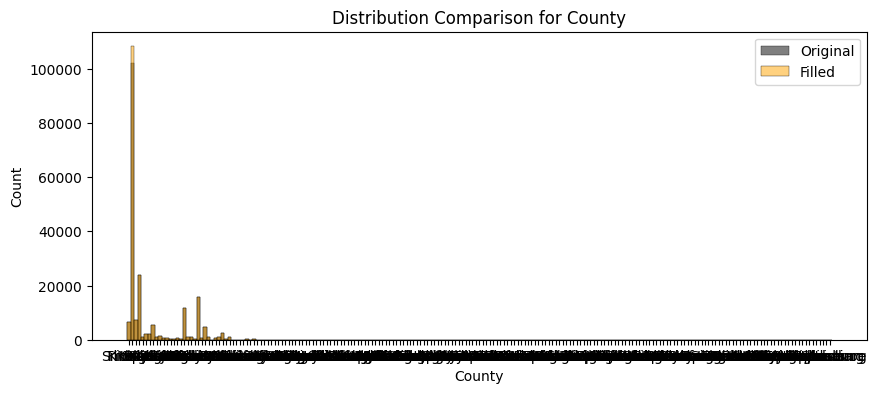

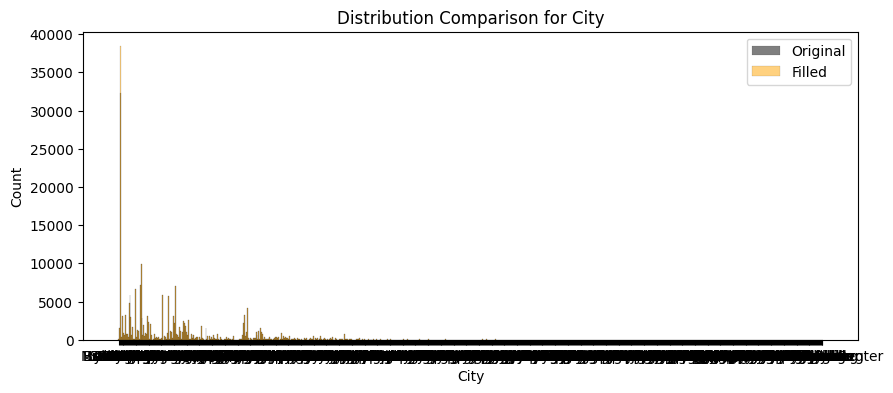

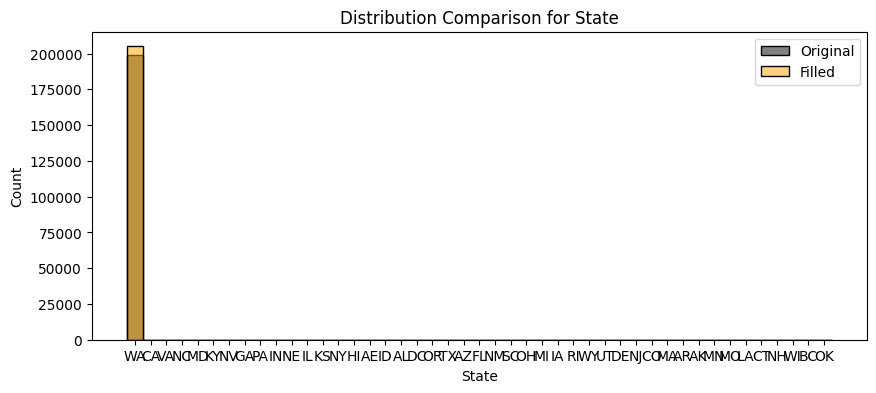

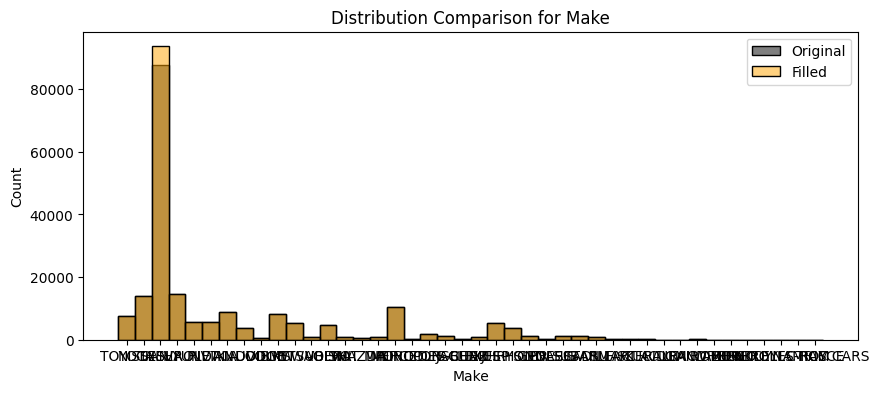

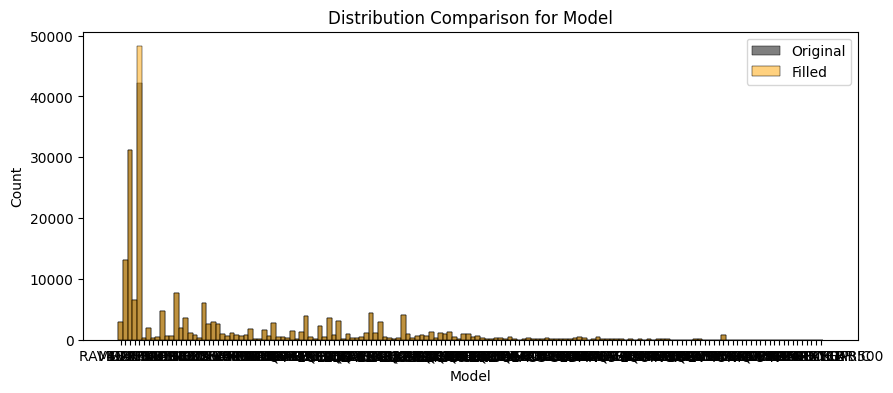

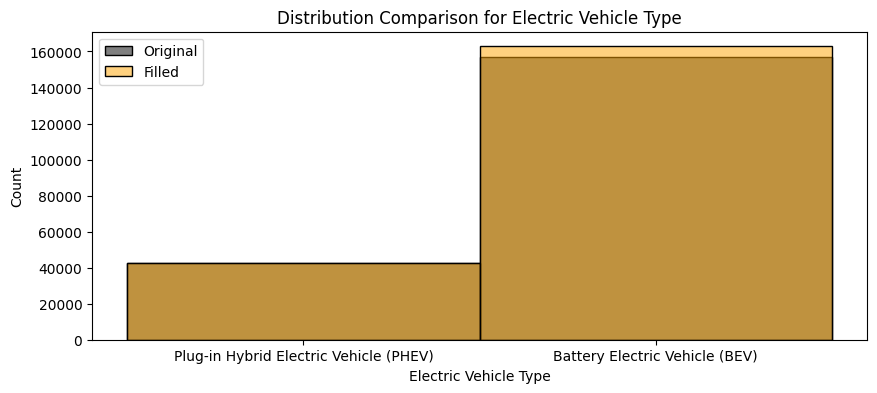

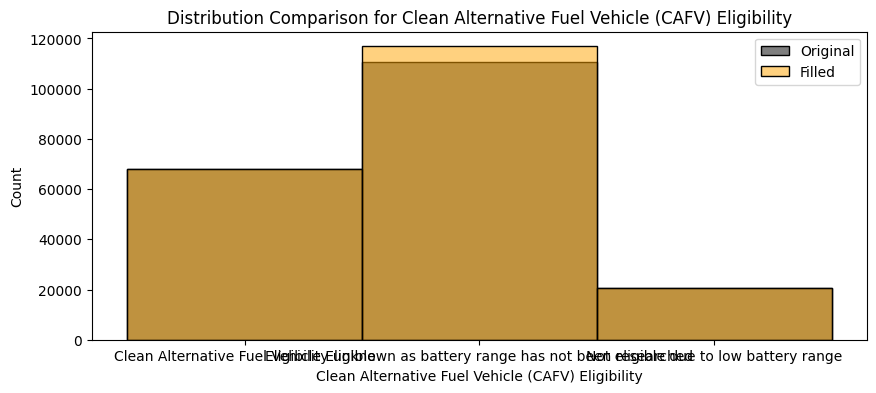

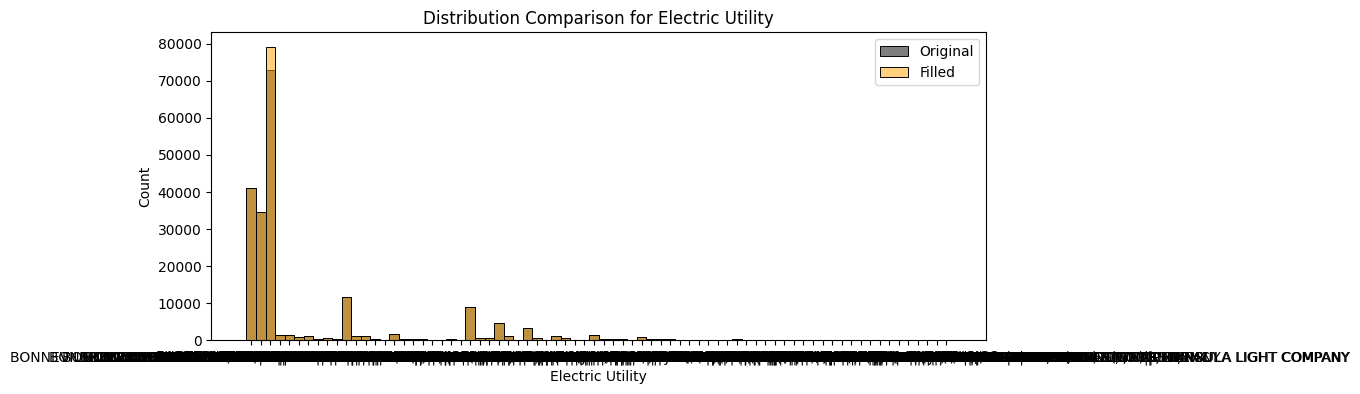

In [15]:
# Comparison before and after filling in missing data;
filled_columns = ['County', 'City', 'State', 'Make', 'Model', 
               'Electric Vehicle Type', 
               'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 
               'Electric Utility']

for column in filled_columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df_before_cat_filling[column], color='black', alpha = 0.5, label='Original')
    sns.histplot(df_with_missing[column], color='orange', alpha = 0.5, label='Filled')
    plt.title(f"Distribution Comparison for {column}")
    plt.legend()
    plt.show()

## 4.2 Filling Data in Numeric Columns


## 4.2.1 Determining Columns Containing Missing Data
#### Let's check the missing data rates again. Then, let's determine which numerical columns we need to process.

In [16]:
# Check missing value from numerical columns
numerical_cols = df_with_missing.select_dtypes(include=['float64','int64']).columns
print(df_with_missing[numerical_cols].isnull().sum())

Postal Code             6174
Model Year              6088
Electric Range          5990
Base MSRP               6019
Legislative District    6481
DOL Vehicle ID          6060
2020 Census Tract       6108
dtype: int64


## 4.2.2 Deciding on the Filling Method
Mean and median can be used to fill numerical data.
- Mean: Suitable for data close to normal distribution.
- Median: More suitable for data with right or left tail distribution.

We should analyze which method is suitable by drawing histograms of numerical columns.

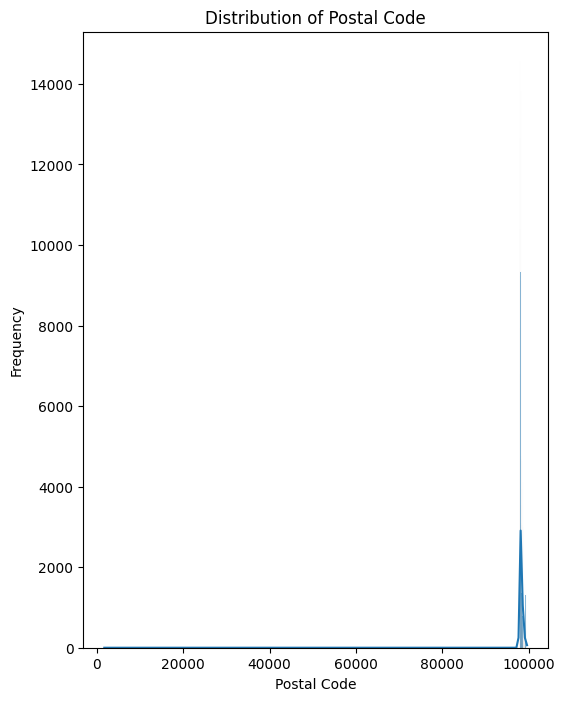

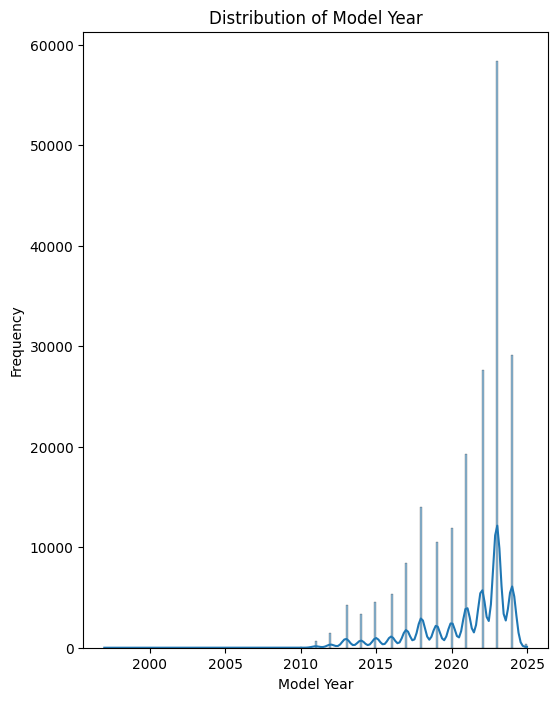

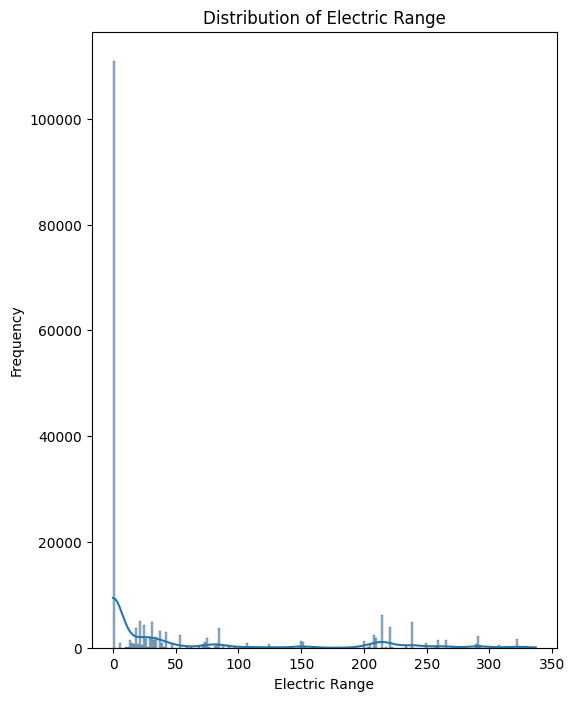

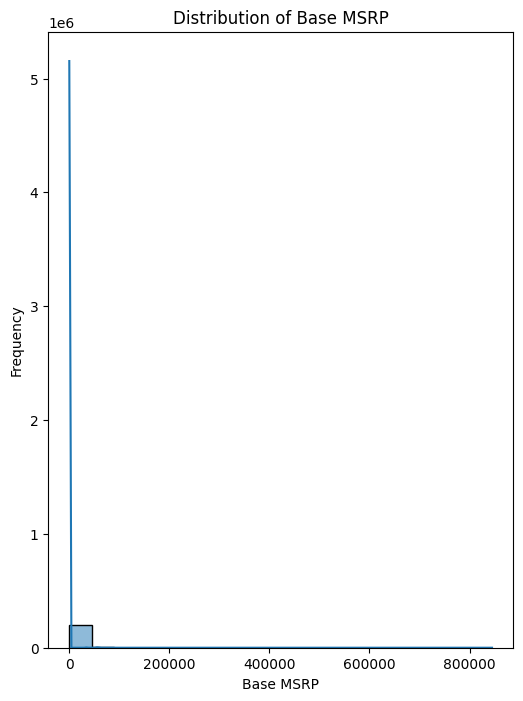

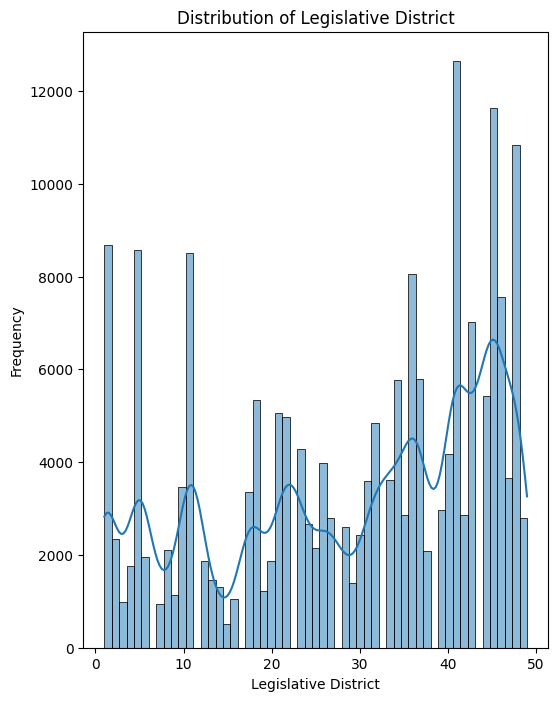

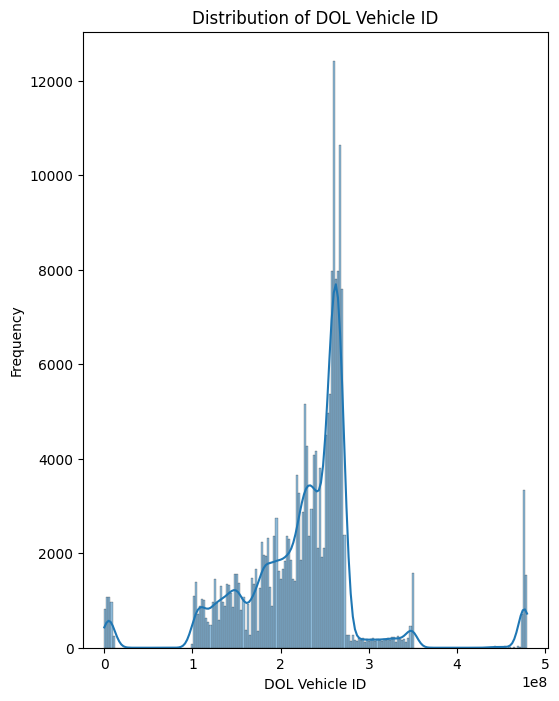

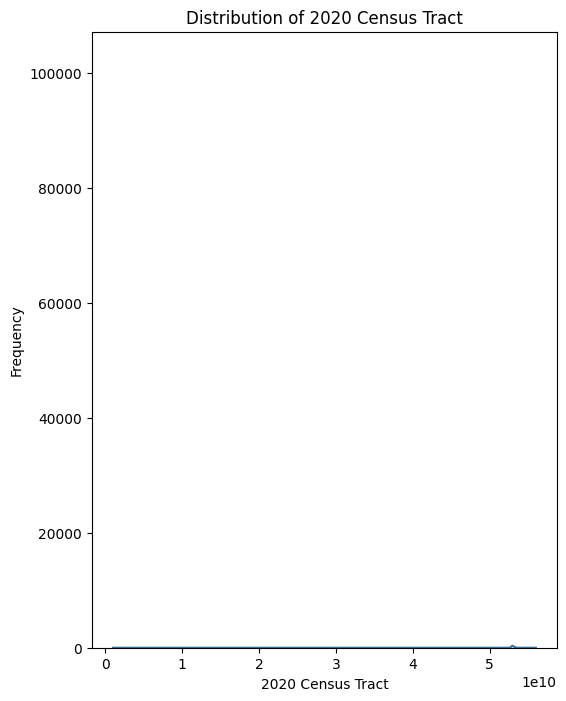

In [17]:
# Distribution of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6,8))
    sns.histplot(df_with_missing[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### We have our histograms for each column. Now we can make our decisions about how to fill each column.
#### Postal Code and Base MSRP values ​​will be filled with the mean value because they are distributed close to the normal value.
#### The other columns will be filled with the median values ​​because they have tail distributions to the right or left.

In [18]:
# Copy dataset from filling
df_before_num_filling = df_with_missing.copy()

#### Columns to be filled with average value
* Postal Code
* Base MSRP

In [19]:
# Filling the Postal Code column with the average value
df_with_missing['Postal Code'] = df_with_missing['Postal Code'].fillna(df_with_missing['Postal Code'].mean())

# Filling the Base MSRP column with the average value
df_with_missing['Base MSRP'] = df_with_missing['Base MSRP'].fillna(df_with_missing['Base MSRP'].mean())



### Columns to fill with Median
* Model Year
* Electric Range
* Legislative District
* DOL Vehicle ID
* 2020 Census Tract

In [20]:
# Filling the Model Year column with the median value
df_with_missing['Model Year'] = df_with_missing['Model Year'].fillna(df_with_missing['Model Year'].median())

# Filling the Electric Range column with the median value
df_with_missing['Electric Range'] = df_with_missing['Electric Range'].fillna(df_with_missing['Electric Range'].median())

# Filling the Legislative District column with the median value
df_with_missing['Legislative District'] = df_with_missing['Legislative District'].fillna(df_with_missing['Legislative District'].median())

# Filling the DOL Vehicle ID column with the median value
df_with_missing['DOL Vehicle ID'] = df_with_missing['DOL Vehicle ID'].fillna(df_with_missing['DOL Vehicle ID'].median())

# Filling the 2020 Census Tract column with the median value
df_with_missing['2020 Census Tract'] = df_with_missing['2020 Census Tract'].fillna(df_with_missing['2020 Census Tract'].median())


In [21]:
# Let's check if the filling process is completed
print(df_with_missing[numerical_cols].isnull().sum())

Postal Code             0
Model Year              0
Electric Range          0
Base MSRP               0
Legislative District    0
DOL Vehicle ID          0
2020 Census Tract       0
dtype: int64


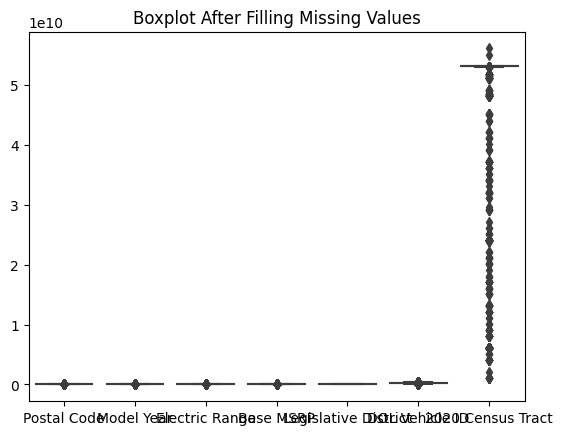

In [22]:
sns.boxplot(data=df_with_missing[numerical_cols])
plt.title("Boxplot After Filling Missing Values")
plt.show()

## 4.2.3 Identifying Columns Containing Zero Values

"0" values ​​can often be missing or non-significant and can mislead analysis results. Therefore, it is very important to check and correct these values ​​accordingly.

In [23]:
# Detect zero values
numeric_columns = df_with_missing.select_dtypes(include=['float64', 'int64']).columns
zero_values_count = (df_with_missing[numeric_columns] == 0).sum()

print("Zero value number on the columns: ")
print(zero_values_count[zero_values_count > 0])

Zero value number on the columns: 
Electric Range    116893
Base MSRP         196211
dtype: int64


## 4.2.3.1 Brand and Model Based Check

Let's check if the Base MSRP and Electric Range columns are zero for each brand and model.

In [24]:
# Check zero values ​​based on brand and model.
zero_check = df_with_missing[df_with_missing[['Base MSRP', 'Electric Range']].eq(0).any(axis=1)] \
    .groupby(['Make', 'Model'])[['Base MSRP', 'Electric Range']] \
    .size().reset_index(name='Zero Count')

print("Vehicles with zero value according to brand and model:")
print(zero_check)


Vehicles with zero value according to brand and model:
           Make    Model  Zero Count
0         ACURA      ZDX          31
1    ALFA ROMEO  MODEL Y           3
2    ALFA ROMEO   TONALE          70
3          AUDI       A3         511
4          AUDI     A7 E           7
..          ...      ...         ...
290       VOLVO      S90          36
291       VOLVO      V60          64
292       VOLVO     XC40        1060
293       VOLVO     XC60        1036
294       VOLVO     XC90        1456

[295 rows x 3 columns]


## 4.2.3.2 Brand and Model Based Filling Process

We fill in values ​​containing zero based on brands and models.

- If data of another vehicle of that brand and model is entered, we will fill in the specified value instead of the zero value.
- If no data of that brand and model is found, we will fill in with the average of that column.

In [25]:
# Calculate the mean values
overall_base_msrp_mean = df_with_missing[df_with_missing['Base MSRP'] != 0]['Base MSRP'].mean()
overall_electric_range_mean = df_with_missing[df_with_missing['Electric Range'] != 0]['Electric Range'].mean()

In [26]:
# Calculate non-zero averages by brand and model
base_msrp_averages = df_with_missing[df_with_missing['Base MSRP'] != 0].groupby(['Make', 'Model'])['Base MSRP'].mean()
electric_range_averages = df_with_missing[df_with_missing['Electric Range'] != 0].groupby(['Make', 'Model'])['Electric Range'].mean()

In [27]:
df_before_num_zero_filling = df_with_missing.copy()

In [28]:
# Let's fill in the Base MSRP values which are zero
df_with_missing['Base MSRP'] = df_with_missing.apply(
    lambda row: base_msrp_averages.get((row['Make'], row['Model']), overall_base_msrp_mean) 
                if row['Base MSRP'] == 0 else row['Base MSRP'], axis=1)

# Let's fill in the Electric Range values which are zero
df_with_missing['Electric Range'] = df_with_missing.apply(
    lambda row: electric_range_averages.get((row['Make'], row['Model']), overall_electric_range_mean) 
                if row['Electric Range'] == 0 else row['Electric Range'], axis=1)


In [29]:
# 5. Check Resuls
print("Zero values at Base MSRP:", (df_with_missing['Base MSRP'] == 0).sum())
print("Zero values at Electric Range:", (df_with_missing['Electric Range'] == 0).sum())


Zero values at Base MSRP: 0
Zero values at Electric Range: 0


In [30]:
# Show filling value
print(df_with_missing.head(10))

   VIN (1-10)     County       City State   Postal Code  Model Year  \
0  JTMAB3FV3P     Kitsap    Seabeck    WA  98380.000000      2023.0   
1  1N4AZ1CP6J     Kitsap  Bremerton    WA  98312.000000      2018.0   
2  5YJ3E1EA4L       King    Seattle    WA  98101.000000      2020.0   
3  1N4AZ0CP8E       King    Seattle    WA  98125.000000      2014.0   
4  1G1FX6S00H   Thurston       Yelm    WA  98597.000000      2017.0   
5  5YJYGDEE5L  Snohomish   Lynnwood    WA  98036.000000      2020.0   
6  KM8S6DA23N     Kitsap    Poulsbo    WA  98370.000000      2022.0   
7  7FCTGAAA1P  Snohomish  Arlington    WA  98223.000000      2023.0   
8  5YJYGDEE9L       King       Kent    WA  98031.000000      2020.0   
9  1N4AZ0CP2F       King    Seattle    WA  98178.282373      2015.0   

        Make       Model                   Electric Vehicle Type  \
0     TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
2      TESLA  

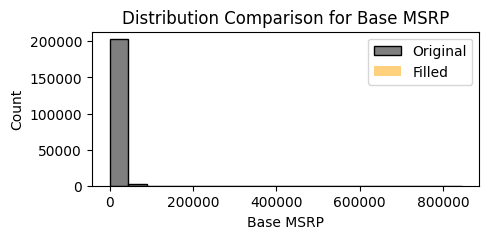

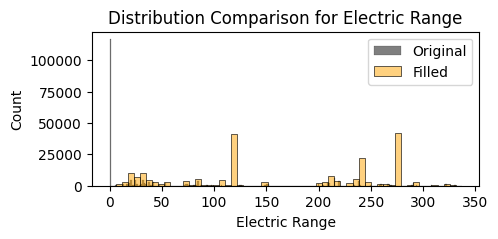

In [31]:
# Compare before and after filling in missing data
filled_columns = ['Base MSRP', 'Electric Range']

for column in filled_columns:
    plt.figure(figsize=(5,2))
    sns.histplot(df_before_num_zero_filling[column], color='black', alpha = 0.5, label='Original')
    sns.histplot(df_with_missing[column], color='orange', alpha = 0.5, label='Filled')
    plt.title(f"Distribution Comparison for {column}")
    plt.legend()
    plt.show()

# 5. Conducting Result Analysis

## 5.1 City-Based Electric Vehicle Distribution Analysis
* In this analysis process, we will group the vehicle numbers using the column containing the city names and visualize this information with a bar chart.
* We will calculate the number of vehicles in each city.
* We will rank the vehicle numbers from highest to lowest.
* We will draw a bar chart by selecting the first 10 cities and see the cities with the highest density.

### Necessary analysis for USA

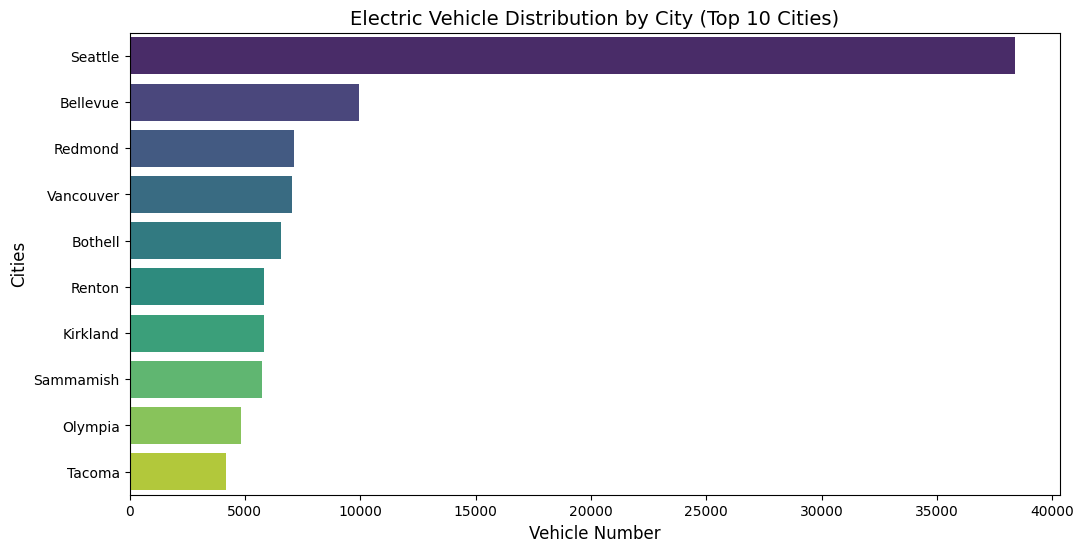

In [32]:
# Group vehicle numbers based on city
city_counts = df_with_missing['City'].value_counts()

# Select top 10 city
top_10_cities = city_counts.head(10)

# Visualize
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.title('Electric Vehicle Distribution by City (Top 10 Cities)',fontsize=14)
plt.xlabel('Vehicle Number',fontsize=12)
plt.ylabel('Cities', fontsize=12)
plt.show()

* According to the initial data obtained from our analysis, Seattle has 4 times more electric vehicle usage than its closest competitor, Bellevue. Therefore, we will continue our analysis from Seattle.
* We will analyze the special features of the vehicles used in this city such as the type of electric vehicle, brand and model.

In [33]:
# Separate Seattle and other cities.
seattle_df = df_with_missing[df_with_missing['City'] == 'Seattle']
other_cities_df = df_with_missing[df_with_missing['City'] != 'Seattle']

In [34]:
# Examine the types and brands of vehicles in Seattle
seattle_ev_type = seattle_df['Electric Vehicle Type'].value_counts()
seattle_make = seattle_df['Make'].value_counts()

# We are also doing these operations in other cities.
other_cities_ev_type = other_cities_df['Electric Vehicle Type'].value_counts()
other_cities_make = other_cities_df['Make'].value_counts()

# Print results
print("Seattle - Electric Vehicle Type: ",seattle_ev_type)
print("Seattle - Brand Distribution: ",seattle_make)

print("Other Cities - Electric Vehicle Type : ",other_cities_ev_type)
print("Other Cities - Brand Distribution: ",other_cities_make)

Seattle - Electric Vehicle Type:  Electric Vehicle Type
Battery Electric Vehicle (BEV)            30857
Plug-in Hybrid Electric Vehicle (PHEV)     7535
Name: count, dtype: int64
Seattle - Brand Distribution:  Make
TESLA             15835
NISSAN             3076
CHEVROLET          2844
BMW                1924
KIA                1736
FORD               1665
TOYOTA             1468
VOLVO              1433
VOLKSWAGEN         1432
HYUNDAI            1379
RIVIAN             1140
AUDI               1028
JEEP                502
CHRYSLER            431
POLESTAR            335
MERCEDES-BENZ       319
MINI                316
FIAT                227
PORSCHE             214
HONDA               177
MITSUBISHI          150
SUBARU              147
LEXUS               108
MAZDA                96
CADILLAC             89
LUCID                66
SMART                56
GENESIS              46
JAGUAR               38
FISKER               31
LINCOLN              24
DODGE                24
ALFA ROMEO        

### Let's see this analysis result visually

Text(0, 0.5, 'Amount')

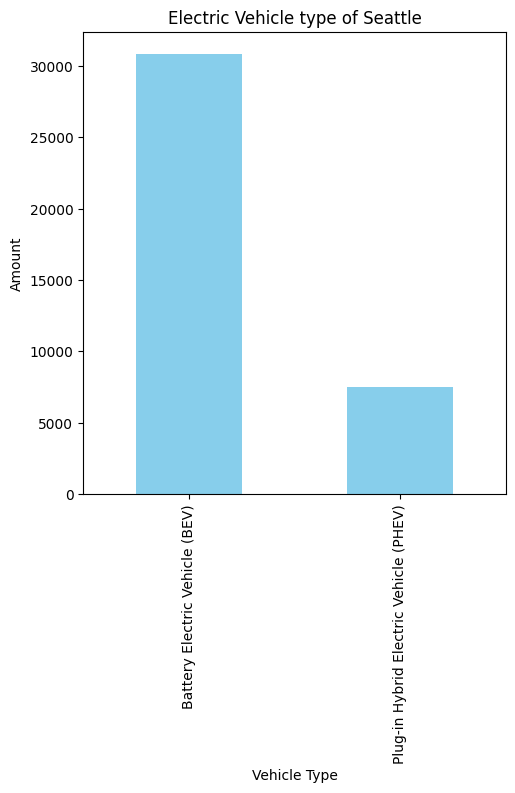

In [35]:
plt.figure(figsize=(12,6))

# Graph for Seattle
plt.subplot(1,2,1)
seattle_ev_type.plot(kind='bar', color='skyblue')
plt.title('Electric Vehicle type of Seattle')
plt.xlabel('Vehicle Type')
plt.ylabel('Amount')

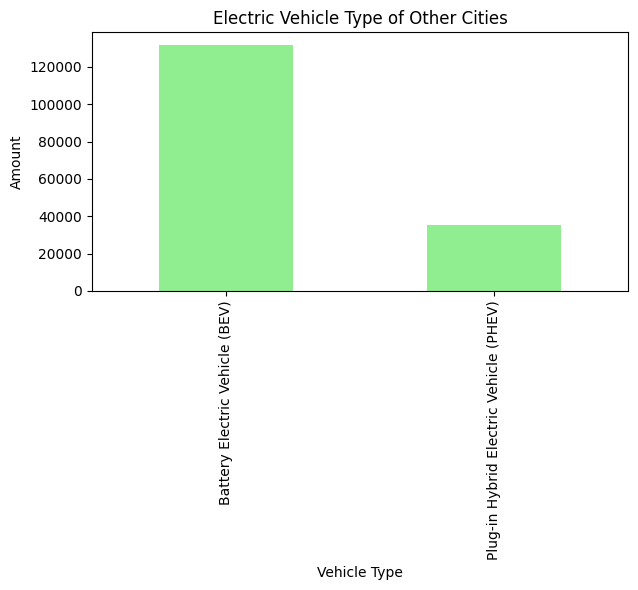

In [36]:
plt.figure(figsize=(12,6))

# Graph for other cities
plt.subplot(1,2,1)
other_cities_ev_type.plot(kind='bar', color='lightgreen')
plt.title('Electric Vehicle Type of Other Cities')
plt.xlabel('Vehicle Type')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Amount')

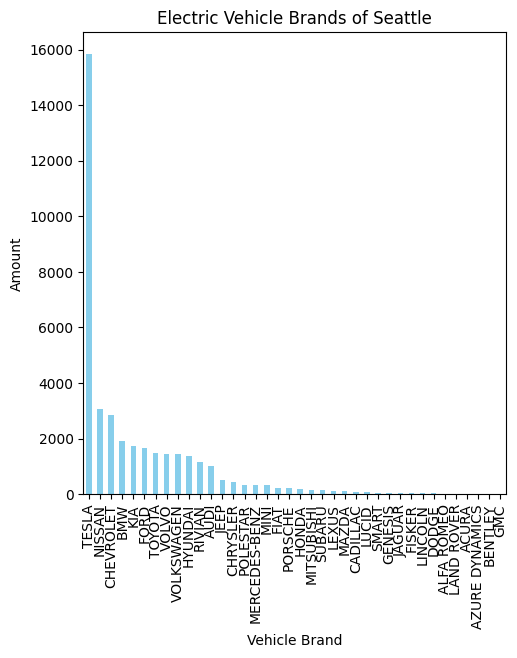

In [37]:
plt.figure(figsize=(12,6))

# Brand Graph for Seattle
plt.subplot(1,2,1)
seattle_make.plot(kind='bar', color='skyblue')
plt.title('Electric Vehicle Brands of Seattle')
plt.xlabel('Vehicle Brand')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

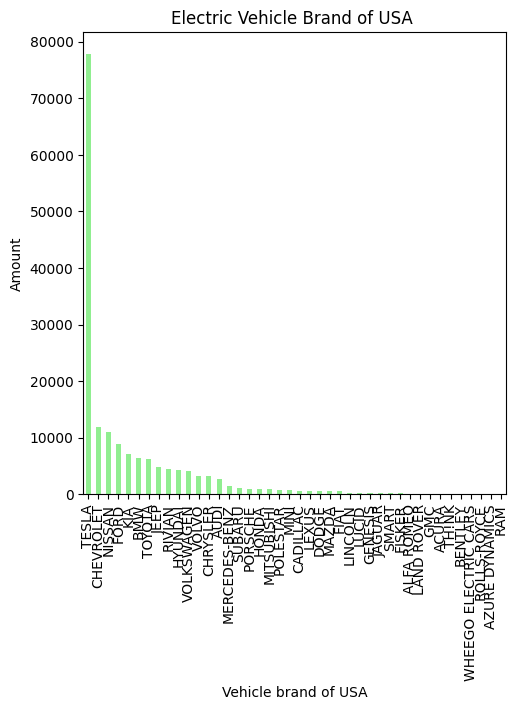

In [38]:
plt.figure(figsize=(12,6))

# Brand Graph for Other Cities
plt.subplot(1,2,1)
other_cities_make.plot(kind='bar', color='lightgreen')
plt.title('Electric Vehicle Brand of USA ')
plt.xlabel('Vehicle brand of USA')
plt.ylabel('Amount')

## 5.2 Tesla vs Other Brands Comparison

In [39]:
# Separate Tesla vehicles and others
tesla_cars = df_with_missing[df_with_missing['Make'] == 'TESLA']
non_tesla_cars = df_with_missing[df_with_missing['Make'] != 'TESLA']
nissan_cars = df_with_missing[df_with_missing['Make'] == 'NISSAN']
chevrolet_cars = df_with_missing[df_with_missing['Make'] == 'CHEVROLET']

# Compare Averages
features = ['Base MSRP', 'Electric Range']
comparison = {
    "Feature": [],
    "Tesla Average": [],
    "Non-Tesla Average": []
}

for feature in features:
    comparison["Feature"].append(feature)
    comparison["Tesla Average"].append(tesla_cars[feature].mean())
    comparison["Non-Tesla Average"].append(non_tesla_cars[feature].mean())

comparison_df = pd.DataFrame(comparison)
print(comparison_df)


          Feature  Tesla Average  Non-Tesla Average
0       Base MSRP    7081.336421        3907.165348
1  Electric Range     249.306836          93.181343


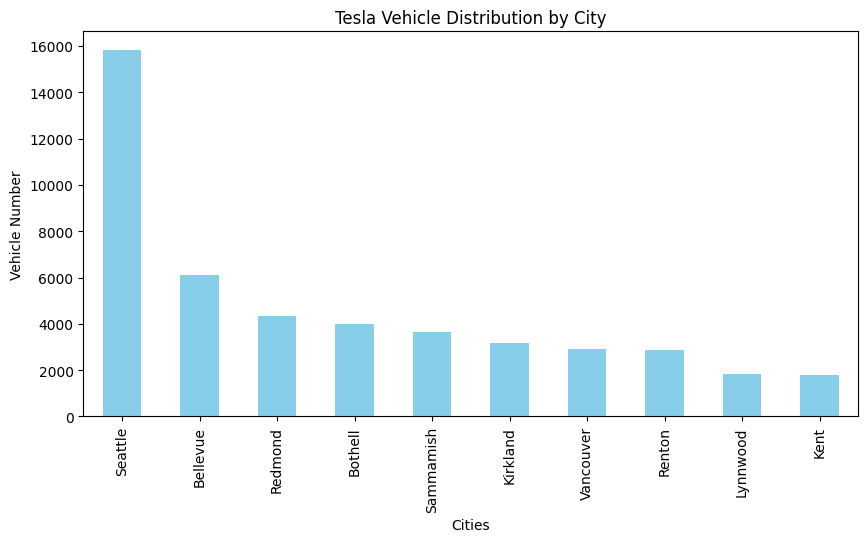

In [40]:
# Tesla numbers by city
tesla_city_distribution = tesla_cars['City'].value_counts()

# Visualize
tesla_city_distribution.head(10).plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Tesla Vehicle Distribution by City')
plt.xlabel('Cities')
plt.ylabel('Vehicle Number')
plt.show()


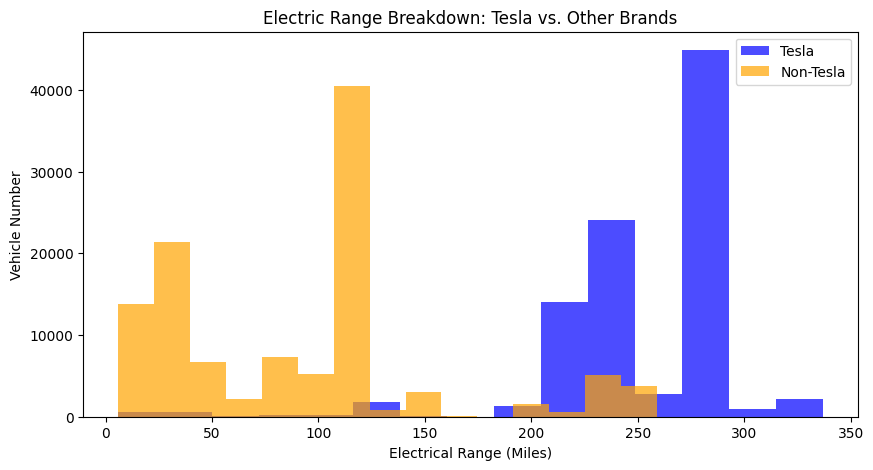

In [41]:
# Range comparison
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(non_tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Non-Tesla', color='orange')
plt.title('Electric Range Breakdown: Tesla vs. Other Brands')
plt.xlabel('Electrical Range (Miles)')
plt.ylabel('Vehicle Number')
plt.legend()
plt.show()


### We compare the ranges of the top 3 brands in terms of usage in all cities.

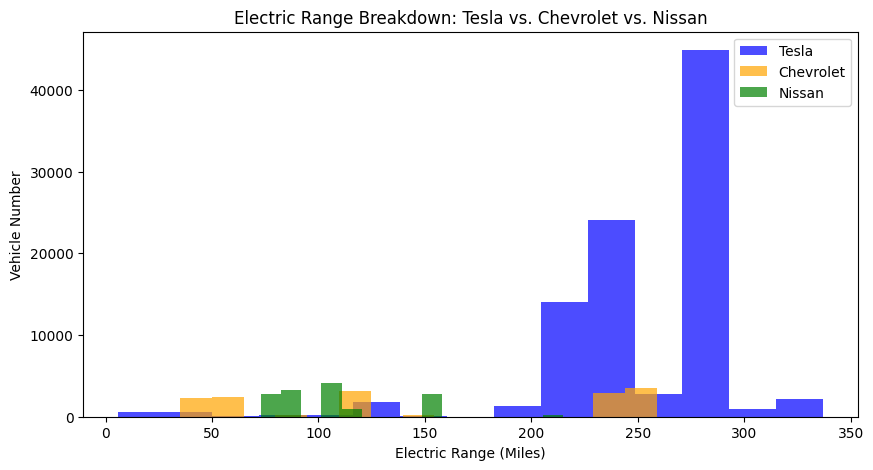

In [42]:
# Range Comparison
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Electric Range'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(chevrolet_cars['Electric Range'], bins=15, alpha=0.7, label='Chevrolet', color='orange')
plt.hist(nissan_cars['Electric Range'], bins=15, alpha=0.7, label='Nissan', color='green')
plt.title('Electric Range Breakdown: Tesla vs. Chevrolet vs. Nissan')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Vehicle Number')
plt.legend()
plt.show()

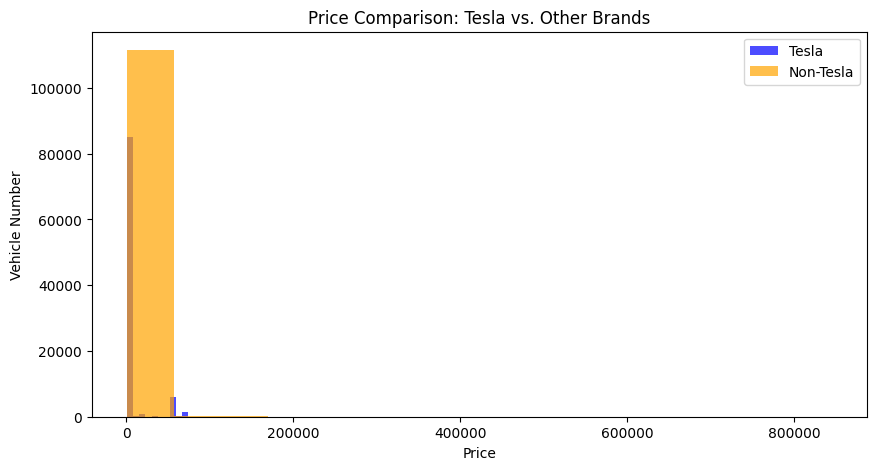

In [43]:
# Price Comparison
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(non_tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Non-Tesla', color='orange')
plt.title('Price Comparison: Tesla vs. Other Brands')
plt.xlabel('Price')
plt.ylabel('Vehicle Number')
plt.legend()
plt.show()

### We compare the prices of the top 3 brands in terms of usage in all cities.

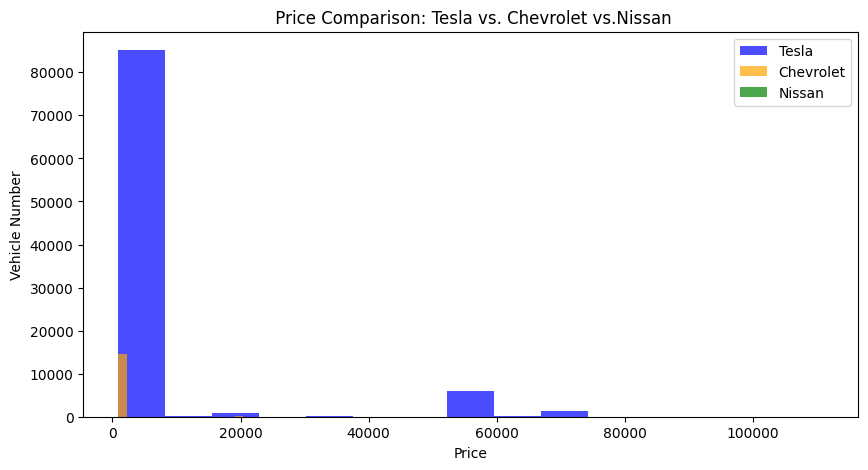

In [44]:
# Price comparison Tesla-Chevrolet-Nissan
plt.figure(figsize=(10, 5))
plt.hist(tesla_cars['Base MSRP'], bins=15, alpha=0.7, label='Tesla', color='blue')
plt.hist(chevrolet_cars['Base MSRP'], bins=15, alpha=0.7, label='Chevrolet', color='orange')
plt.hist(nissan_cars['Base MSRP'], bins=15, alpha=0.7, label='Nissan', color='green')
plt.title(' Price Comparison: Tesla vs. Chevrolet vs.Nissan')
plt.xlabel('Price')
plt.ylabel('Vehicle Number')
plt.legend()
plt.show()

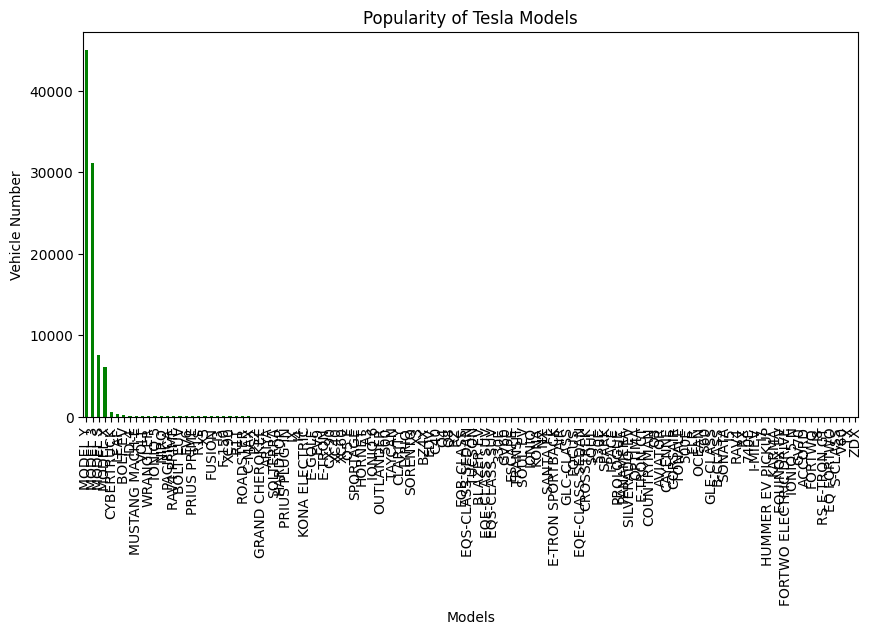

In [45]:
# Find out the popularity of Tesla models
tesla_model_distribution = tesla_cars['Model'].value_counts()

# Visualize
tesla_model_distribution.plot(kind='bar', color='green', figsize=(10, 5))
plt.title('Popularity of Tesla Models')
plt.xlabel('Models')
plt.ylabel('Vehicle Number')
plt.show()


## 6. Analysis Report  

### Project Title: The State of Electric Vehicles in the Market and Tesla's Leadership  

### Project Objectives  
1. **Analyze the distribution of electric vehicles across cities.**  
2. **Identify the most common brands among electric vehicles.**  
3. **Understand the reasons behind Tesla's market leadership.**  
4. **Develop concrete recommendations for energy infrastructure investments.**  

---

### Project Process and Steps  

#### 1️⃣ Data Preparation and Missing Data Management  
- The **Electric Vehicle Population Data** dataset obtained from Kaggle was examined.  
- Missing data in the dataset was identified, and random **NaN** values were added to test missing data management processes.  
- Missing data was filled based on brand and model, and general average values were used where this was not possible.  
- Several columns with a high number of "0" values were identified. These rows were filled with corresponding values if available, or with average values if not.  
- These processes ensured the data was ready for analysis.  

#### 2️⃣ City-Based Analysis of Electric and Hybrid Vehicles  
- **Seattle** was identified as the city with the highest density of electric vehicles in the distribution across cities.  
- Electric vehicles were found to be gaining popularity faster compared to hybrid vehicles.  
- This analysis highlighted that electric vehicles will capture a larger market share in the future and will significantly impact the fossil fuel sector.  

#### 3️⃣ Distribution of Electric Vehicle Brands  
- The most common brands among electric vehicles were analyzed.  
- Tesla emerged as the market leader both in **Seattle** and other cities:  
  - **Tesla vehicles in Seattle** are approximately 8 times more than the total of all other brands.  
  - The most preferred other brands are **Chevrolet** and **Nissan**.  

#### 4️⃣ Reasons Behind Tesla's Market Leadership  
Tesla's leadership was analyzed in detail:  
- **Electric Range Advantage:** Tesla vehicles have a significantly higher range compared to competitors.  
- **Price-Performance Ratio:** Tesla outperforms in "price per mile" analysis relative to its starting prices.  
- **Technological Innovations:** Tesla's innovative technologies, such as autonomous driving, set the brand apart.  
- **Popular Models:** Tesla's affordable models like **Model 3** and **Model Y** reinforce its leadership.  

---

### Conclusions and Recommendations  

#### 📝 Key Findings  
1. The electric vehicle market is growing rapidly, with Tesla being the clear leader.  
2. The main reasons for Tesla's success:  
   - **Electric range**  
   - **Price-performance ratio**  
   - **Technological innovations**  
3. The popularity of electric vehicles is surpassing that of hybrid and fossil fuel vehicles.  

#### 💡 Recommendations  
1. Investments can be made in electric vehicle charging infrastructure. Especially in regions like **Seattle**, where electric vehicle usage is high, charging stations can be established to increase market share.  
2. **Integrated energy solutions** for electric vehicles should be developed.  
   - Renewable energy-supported home charging devices can be offered.  
   - Collaborations with electric vehicle brands can be established.  
3. **Partnerships with leading brands like Tesla** can provide advantages in charging infrastructure and enhance brand prestige.  

---

### Notes:  
- These analysis results are based solely on Washington State and the selected dataset.  
- For a more comprehensive analysis, data from other states or countries can be added.  
- In the future, energy infrastructure development and detailed analysis of user behavior can be conducted.  